# Machine Learning Fundamentals: Bias and Variance

In this notebook, we'll explore and visualize the concepts of bias and variance in machine learning. We'll use a synthetic dataset for simplicity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


First, let's create a synthetic dataset. We'll use a quadratic function (a parabola) to generate our data. We'll add some random noise to make the task a bit more challenging.

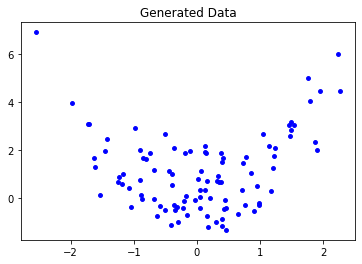

In [2]:
np.random.seed(0)
x = np.random.normal(0, 1, 100).reshape(-1, 1)
y = x**2 + np.random.normal(0, 1, 100).reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
plt.scatter(x, y, color='blue', s=15)
plt.title('Generated Data')
plt.show()

We'll start by trying to fit a linear model to this data. As we can see from the plot, a linear model is unlikely to fit this data well, but let's try it anyway for the sake of demonstration.

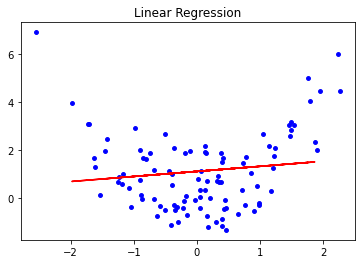

In [3]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.scatter(x, y, color='blue', s=15)
plt.plot(x_test, y_pred, color='red')
plt.title('Linear Regression')
plt.show()

As expected, the linear model doesn't fit the data well. This is an example of underfitting, and it's caused by high bias. The linear model doesn't have the flexibility to capture the true relationship between $x$ and $y$, which is non-linear. 

Now, let's try fitting a more complex model to the data. We'll use polynomial regression with a high degree. This will allow the model to fit even very complex, non-linear relationships.

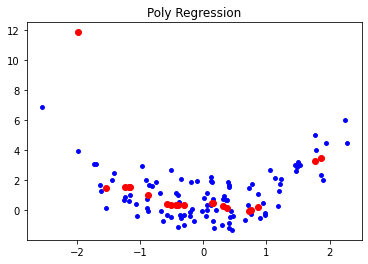

In [11]:
poly_features = PolynomialFeatures(degree=10)
x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)
model = LinearRegression()
model.fit(x_poly_train, y_train)
y_pred = model.predict(x_poly_test)
plt.scatter(x, y, color='blue', s=15)
plt.plot(x_test, y_pred, 'o', color='red')
plt.title('Poly Regression')
plt.show()

The polynomial regression model fits the training data almost perfectly. However, it's likely that this model will not generalize well to unseen data. This is an example of overfitting, and it's caused by high variance. The model is too complex and has essentially memorized the training data, including the noise.

In machine learning, we ideally want to find a model that balances bias and variance, minimizing total error. This is known as the Bias-Variance tradeoff. Too much bias will lead to underfitting - the model is too simple to capture the underlying structure of the data. Too much variance leads to overfitting - the model is overly complex and is too influenced by the noise or random fluctuations in the training data.